# Algorithme des plus proches voisins

knn : k nearest neighbors

## Génération de données d'exemple

In [1]:
points_bleus = []
points_rouges = []

Dans un premier exemple les points au dessus de la diagonale sont bleus et ceux en dessous sont rouges.

Générer les coordonnées des différents points $(x,y)$, comprises entre 0 et 100.

[random — Generate pseudo-random numbers](https://docs.python.org/3/library/random.html)

    random.randint(a, b)
    Return a random integer N such that a <= N <= b. Alias for randrange(a, b+1).


In [5]:
import random
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(20, 23, 58)

In [8]:
random.seed(42)
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(81, 14, 3)

In [9]:
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(94, 35, 31)

In [12]:
random.randint(0,100)

14

Génération de 10 points de chaque couleur:

In [16]:
random.seed(42)

n = 10  # Nombre de points par couleur

while len(points_bleus)!=n or len(points_rouges)!=n:
    x = random.randint(0,100)
    y = random.randint(0,100)
    if y >= x and len(points_bleus) < n:
        points_bleus.append((x,y))
    elif y < x and len(points_rouges) < n:
        points_rouges.append((x,y))

In [17]:
points_bleus

[(86, 94),
 (11, 27),
 (29, 64),
 (57, 75),
 (19, 27),
 (5, 93),
 (58, 68),
 (15, 48),
 (10, 70),
 (37, 80)]

In [18]:
points_rouges

[(28, 17),
 (94, 13),
 (69, 11),
 (75, 54),
 (4, 3),
 (77, 3),
 (71, 25),
 (91, 83),
 (89, 69),
 (53, 28)]

## Visualisation

[matplotlib scatter plot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

[Les couleurs sous matplotlib](https://matplotlib.org/stable/gallery/color/color_demo.html)

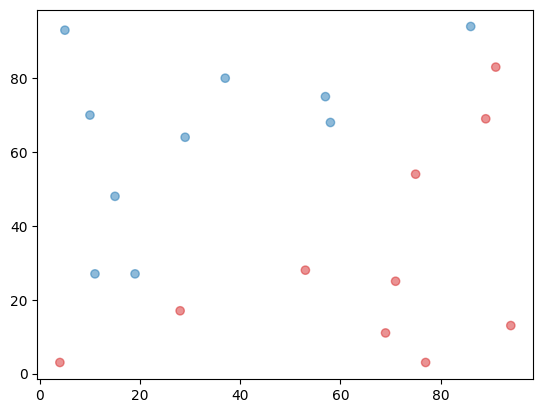

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# points_bleus puis points_rouges

abscisses = []
ordonnées = []
couleurs = []

for x,y in points_bleus:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:blue')
for x,y in points_rouges:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:red')

plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

## Classification d'un nouveau point pris au hasard

exemple avec k = 3

In [20]:
# nouveau_point = (random.randint(0,100), random.randint(0,100))
nouveau_point = (11, 48)

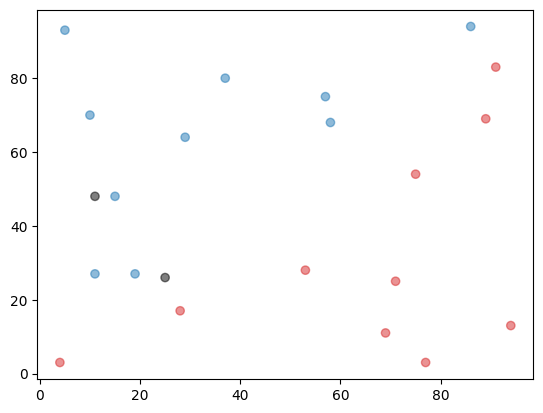

In [21]:
# Visualisation du jeu de données et des points que l'on cherche à classer (ici représentés en vert)
abscisses.append(11)
ordonnées.append(48)
abscisses.append(25)
ordonnées.append(26)
couleurs.append('black')
couleurs.append('black')
plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

## Jeu de données initial et étiquettes associées

In [22]:
points = points_bleus + points_rouges
couleurs = ['bleu']*10 + ['rouge']*10

In [23]:
couleurs

['bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge']

## Etapes de l'algorithme

Distance entre deux points A et B du plan:

$$ L_2(A,B) = \sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$$

[python library math](https://docs.python.org/3/library/math.html)
 
    math.dist(p, q)

    Return the Euclidean distance between two points p and q, each given as a sequence (or iterable) of coordinates. The two points must have the same dimension.

In [24]:
import math

origine = (0,0)
unité = (1,1)
math.dist(origine, unité)

1.4142135623730951

Calcul de l'ensemble des distances du nouveau point aux points du jeu de données initiales

In [25]:
distances = [math.dist(point, nouveau_point) for point in points]

In [26]:
# La ligne précédente est équivalente à :
distances = []
for point in points:
    distances.append(math.dist(point, nouveau_point))

[realpython list comprehension](https://realpython.com/list-comprehension-python/)

In [27]:
distances

[87.98295289429652,
 21.0,
 24.08318915758459,
 53.33854141237835,
 22.47220505424423,
 45.39823785126467,
 51.07837115648854,
 4.0,
 22.02271554554524,
 41.23105625617661,
 35.35533905932738,
 90.07774419910837,
 68.79680225126747,
 64.28063471995279,
 45.5411901469428,
 79.88116173416608,
 64.25729530566937,
 87.32124598286491,
 80.77747210701756,
 46.51881339845203]

In [27]:
# Liste des distances associées aux couleurs de points
[(d, c) for (d,c) in zip(distances, couleurs)]

[(46.69047011971501, 'bleu'),
 (87.98295289429652, 'bleu'),
 (21.0, 'bleu'),
 (24.08318915758459, 'bleu'),
 (53.33854141237835, 'bleu'),
 (22.47220505424423, 'bleu'),
 (45.39823785126467, 'bleu'),
 (51.07837115648854, 'bleu'),
 (4.0, 'bleu'),
 (22.02271554554524, 'bleu'),
 (29.410882339705484, 'rouge'),
 (35.35533905932738, 'rouge'),
 (90.07774419910837, 'rouge'),
 (68.79680225126747, 'rouge'),
 (64.28063471995279, 'rouge'),
 (45.5411901469428, 'rouge'),
 (79.88116173416608, 'rouge'),
 (64.25729530566937, 'rouge'),
 (87.32124598286491, 'rouge'),
 (80.77747210701756, 'rouge')]

In [31]:
distances_classées = sorted([(d, c) for (d,c) in zip(distances, couleurs)])
distances_classées

[(4.0, 'bleu'),
 (21.0, 'bleu'),
 (22.02271554554524, 'bleu'),
 (22.47220505424423, 'bleu'),
 (24.08318915758459, 'bleu'),
 (29.410882339705484, 'rouge'),
 (35.35533905932738, 'rouge'),
 (45.39823785126467, 'bleu'),
 (45.5411901469428, 'rouge'),
 (46.69047011971501, 'bleu'),
 (51.07837115648854, 'bleu'),
 (53.33854141237835, 'bleu'),
 (64.25729530566937, 'rouge'),
 (64.28063471995279, 'rouge'),
 (68.79680225126747, 'rouge'),
 (79.88116173416608, 'rouge'),
 (80.77747210701756, 'rouge'),
 (87.32124598286491, 'rouge'),
 (87.98295289429652, 'bleu'),
 (90.07774419910837, 'rouge')]

In [32]:
k=3
distances_classées[:k]

[(4.0, 'bleu'), (21.0, 'bleu'), (22.02271554554524, 'bleu')]

Cas d'une classification erronée (dûe au manque de points dans le jeu de données initial)

In [33]:
nouveau_point = (25, 26)  # devrait être classé en bleu
distances = [math.dist(point, nouveau_point) for point in points]
plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, couleurs)])[:k]
plus_petites_distances

[(6.082762530298219, 'bleu'),
 (9.486832980505138, 'rouge'),
 (11.180339887498949, 'rouge')]

Extraction de la couleur la plus fréquente:

In [34]:
from collections import Counter
Counter([couleur for _, couleur in plus_petites_distances]).most_common(1)[0][0]

'rouge'

## Fonction kNN

In [35]:
from collections import Counter

def kNN(X, y, new_x, k=3):
    """
    args:
        X: jeu de données initiales
        y: classes associées aux éléments de X 
        new_x: nouveau point que l'on souhaite classer
        k: nombre de voisins pris dans l'évaluation

    return:
        La classe de `y` la plus fréquente
    """
    distances = [math.dist(new_x, x) for x in X]
    plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, y)])[:k]
    counter = Counter([classe for _, classe in plus_petites_distances])
    
    return counter.most_common(1)[0][0]

In [40]:
kNN(points, couleurs, (25, 26))  # devrait être classé en bleu

'rouge'

In [41]:
kNN(points, couleurs, (11, 48))  # devrait être classé en bleu

'bleu'

## Références

[StatQuest: K-nearest neighbors, Clearly Explained](https://www.youtube.com/watch?v=HVXime0nQeI)